In [21]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [22]:
pwd

'/home/ec2-user/SageMaker/Satellite_AgriTech_USGS_LIDAR/Notebooks'

In [23]:
landsat_bands_data_path = "/home/ec2-user/SageMaker/Satellite_AgriTech_USGS_LIDAR/Data/iowa.tif"
stack_band_paths = glob(landsat_bands_data_path)

In [24]:
stack_band_paths.sort()

In [25]:
stack_band_paths

['/home/ec2-user/SageMaker/Satellite_AgriTech_USGS_LIDAR/Data/iowa.tif']

In [27]:
ds = gdal.Open("/home/ec2-user/SageMaker/Satellite_AgriTech_USGS_LIDAR/Data/iowa.tif")
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

In [28]:
print(gt)

(446112.7027723251, 1.0, 0.0, 4654068.173126178, 0.0, -1.0)


In [29]:
print(proj)

PROJCS["NAD83 / UTM zone 15N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26915"]]


In [30]:
band = ds.GetRasterBand(1)
array = band.ReadAsArray()

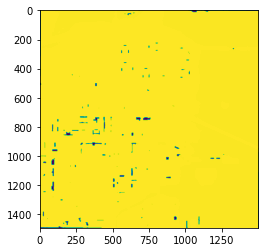

In [31]:
plt.figure()
plt.imshow(array)

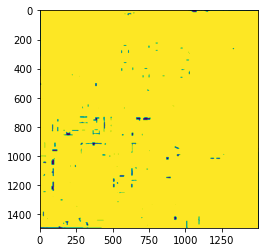

In [32]:
#manipulate into numpy array 
binmask = np.where((array >= np.mean(array)),1,0)
plt.figure()
plt.imshow(binmask)

In [33]:
#export to gdal file 
driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("/home/ec2-user/SageMaker/Satellite_AgriTech_USGS_LIDAR/Data/binmask.tif", xsize = binmask.shape[1],
                      ysize = binmask.shape[0], bands = 1, 
                      eType = gdal.GDT_Int16)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(binmask)
outband.SetNoDataValue(np.nan)
outband.FlushCache()

In [34]:
outband = None
outds = None